## Practice Scenario with Excel Sheet ##

Practice Problem: Analyzing Restaurant Sales Trends from Raw Data
Scenario:
You’ve received raw sales data from a third-party vendor tracking credit card transactions at multiple restaurant locations (e.g., McDonald’s and Chipotle). Your goal is to clean the data, perform ETL (Extract, Transform, Load), and draw insights for a stakeholder dashboard.

Excel Columns in restaurant_sales.xlsx:

Transaction ID

Date

Restaurant Name

Location

Sales Amount

Customer ID (optional)

Category (e.g., "Drive-Thru", "Dine-In", "Delivery", may be missing or mislabeled)



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
## Part 1: Load Excel File

df = pd.read_excel("restaurant_sales.xlsx")
print("Initial Data Overview: ")
print(df.head())
print("\\nMissing Values\n", df.isnull().sum())

Initial Data Overview: 
                         Transaction ID       Date Restaurant Name  \
0  1973ec33-4711-4407-aebc-37416e08bf2e 2025-05-14      McDonald's   
1  40d50788-aaaa-487b-adee-1a85415a399c 2025-05-14      McDonald's   
2  43b35c1e-3890-4d6d-b638-6a73b9925f33 2025-05-14       Taco Bell   
3  bbe7ebd5-e202-43d7-bed0-07d86f43fdde 2025-05-14        Chipotle   
4  1c6756b7-9a45-4a80-8d71-938e1f747d18 2025-05-14        Chipotle   

      Location  Sales Amount                           Customer ID  Category  
0  Chicago, IL         39.70  d0e0a1da-ea35-4b9c-957b-4d203ee75191   Dine-in  
1  Chicago, IL         14.49  31bc8b27-fa11-4c09-a590-634022d3e9f7  Delivery  
2  Phoenix, AZ         32.81  2fd903a1-acba-4889-8148-4e305b983943  Deliveri  
3  Phoenix, AZ           NaN  46613251-896d-4ae4-bdf2-b75ecd017f03       NaN  
4  Houston, TX         29.55                                   NaN  Deliveri  
\nMissing Values
 Transaction ID       0
Date                 0
Restaurant Name  

In [6]:
df.columns

Index(['Transaction ID', 'Date', 'Restaurant Name', 'Location', 'Sales Amount',
       'Customer ID', 'Category'],
      dtype='object')

In [7]:
# Step 3: Clean Column names for consistency

df.columns = df.columns.str.strip().str.lower().str.replace(' ', ' ')
df.columns

Index(['transaction id', 'date', 'restaurant name', 'location', 'sales amount',
       'customer id', 'category'],
      dtype='object')

In [8]:
# Step 4: handle missing values
# Fill in missing categories with unknown
df['category'] = df['category'].fillna("Unknown")

In [9]:
# Remove rows with missing dates and/or sales amounts (critical fields)
df = df.dropna(subset=["sales amount", "date"])


In [10]:
# Step 5: Convert data types
df['date'] = pd.to_datetime(df['date'])
df['sales amount'] = pd.to_numeric(df['sales amount'], errors = 'coerce')

In [11]:
# Step 6: feature engineering
df['month'] = df['date'].dt.to_period('M')

In [12]:
# Step 7: group and summarize
monthly_sales = df.groupby(['month', 'restaurant name'])['sales amount'].sum().unstack()
category_breakdown = df.groupby(['restaurant name', 'category'])['sales amount'].sum().unstack().fillna(0)

In [13]:
# Step 8: Insighs
print("\n --- Monthly Sales Summary ---")
print(monthly_sales.tail())

print("\n --- Sales Breakdown by Category ---")
print(category_breakdown)


 --- Monthly Sales Summary ---
restaurant name  Chipotle  McDonald's  Mcdonalds  Starbucks   Subway  \
month                                                                  
2025-05           5248.87     5548.27     205.62    5297.77  5042.44   

restaurant name  Taco Bell  
month                       
2025-05            5139.24  

 --- Sales Breakdown by Category ---
category                Deliveri  Delivery  Dine-In  Dine-in  Drive-Thru  \
restaurant name                                                            
Chipotle         41.35    740.86    597.09   848.31   848.18      713.03   
McDonald's       99.49    681.31    713.04  1126.88   985.59      922.20   
Mcdonalds        27.94      7.49     13.10    27.40     0.00        0.00   
Starbucks        15.33    776.88    741.57   770.38   822.26      681.52   
Subway            0.00    809.21    854.68   510.43  1039.45      740.86   
Taco Bell        80.08    653.09    974.25   766.28  1021.79      434.51   

category         

/opt/anaconda3/envs/finance/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/opt/anaconda3/envs/finance/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/opt/anaconda3/envs/finance/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/opt/anaconda3/envs/finance/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/opt/anaconda3/envs/finance/lib/

<Figure size 1200x600 with 0 Axes>

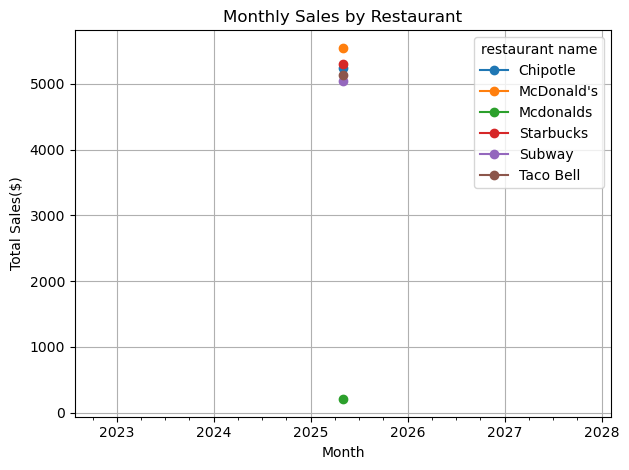

In [14]:
# Step 9: Visualization

plt.figure(figsize = (12,6))
monthly_sales.plot(marker = 'o')
plt.title("Monthly Sales by Restaurant")
plt.ylabel("Total Sales($)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

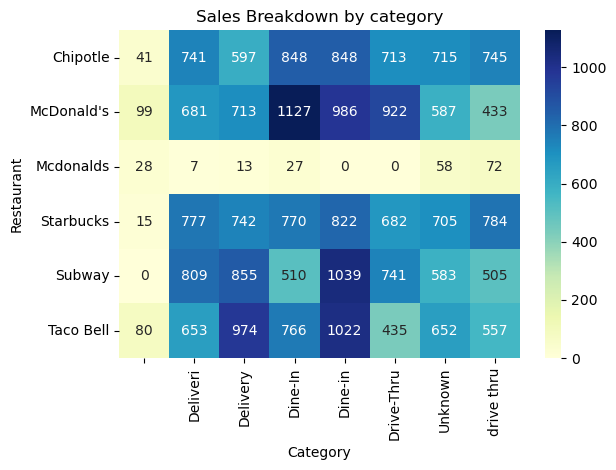

In [15]:
sns.heatmap(category_breakdown, annot = True, fmt=".0f", cmap = 'YlGnBu')
plt.title("Sales Breakdown by category")
plt.ylabel("Restaurant")
plt.xlabel("Category")
plt.tight_layout()
plt.show()